# For evaluating Classification type problem used methods
    1. Accuracy
    2. Precison (P)
    3.Recall (R)
    4.F1 Score (F1)
    5. AUC 
    

# Accuracy
Basic Evaluation Metric
Note : This evaluation metric normally used when same number of positive and negative targets are available 

In [1]:
#Let true and predicted value of a calssifier
y_true=[1,0,1,0,1,0,0,1]
y_pred=[0,1,1,0,1,1,0,1]

In [2]:
#Python Code
def accuracy(y_true,y_pred):
    count=0
    for y_t,y_p in zip(y_true,y_pred):
        if y_t==y_p:
            count+=1
            
    acc=count/len(y_true)
    return acc

In [3]:
print(f"So Accuracy of the model using Python Code{accuracy(y_true,y_pred)}")

So Accuracy of the model using Python Code0.625


In [4]:
#Using sci-kit learn
from sklearn import metrics

metrics.accuracy_score(y_true,y_pred)

0.625

# TP, TN, FP, FN

    True Positive (TP) : Predicts Positive(1) and Actual is also Positive(1)
    True Negative (TN) : Predicts Negative(0) and Actual is also Negative(0)
    False Positive (FP): Predicts Positive (1) and Actual is Negative(0)
    False Negative (FN): Predicts Negative (0) and Actual is Positive(1)

In [5]:
def true_positive(y_true, y_pred):
    TP=0
    for y_t, y_p in zip(y_true, y_pred):
        if y_p==1 and y_t==1:
            TP+=1
            
    return TP        

In [6]:
def true_negative(y_true, y_pred):
    TN=0
    for y_t, y_p in zip(y_true, y_pred):
        if y_p==0 and y_t==0:
            TN+=1
            
    return TN        

In [7]:
def false_positive(y_true, y_pred):
    FP=0
    for y_t, y_p in zip(y_true, y_pred):
        if y_p==1 and y_t==0:
            FP+=1
            
    return FP        

In [8]:
def false_negative(y_train, y_pred):
    FN=0
    for y_t, y_p in zip(y_true, y_pred):
        if y_p==0 and y_t==1:
            FN+=1
            
    return FN        

# Accuracy using this 
    Accuracy=(TP+TN)/(TP+TN+FP+FN)
    

In [9]:
TP=true_positive(y_true,y_pred)
print(f"True Positive : {TP}")

TN=true_negative(y_true,y_pred)
print(f"True Positive : {TN}")

FP=false_positive(y_true,y_pred)
print(f"True Positive : {FP}")

FN=false_negative(y_true,y_pred)
print(f"True Positive : {FN}")

True Positive : 3
True Positive : 2
True Positive : 2
True Positive : 1


In [10]:
accuracy=(TP+TN)/(TP+TN+FN+FP)
accuracy

0.625

Same as before

# Precision (P) 
    precision=TP/(TP+FP)
    This means the model is correct precision times when its trying to identify positive samples

In [11]:
precision=TP/(TP+FP)
P=precision
P

0.6

so the model is correct 60% time when its trying to identify positive samples

# Recall(P)
    recall=TP/(TP+FN)
    This means the model identified (recall)% of positve samples correctly

In [12]:
recall=TP/(TP+FN)
R=recall
R

0.75

so 75% of positive samples identifed correctly

# Higher Precision and Recall is Good. Normally threshold is 50%

# F1 score
    F1 score is a matric that combines both precisions(P) and Recalls(R)
        F1= 2PR/(P+R)

In [13]:
F1=2*P*R/(P+R)
F1

0.6666666666666665

In [14]:
# Using Scikit learn
metrics.f1_score(y_true,y_pred)

0.6666666666666665

# When Dataset are Skewed F1 is used instead of Accuracy

In [15]:
TPR=recall
FPR=FP/(FP+TN)

In [16]:
print(f"TPR is {TPR} and FPR is {FPR}")

TPR is 0.75 and FPR is 0.5


In [17]:
def tpr(y_true, y_pred):
    TP=true_positive(y_true,y_pred)
    TN=true_negative(y_true,y_pred)
    FN=false_negative(y_true,y_pred)
    FP=false_positive(y_true,y_pred)
    print(f"TP : {TP}, FP {FP}, TN {TN}, FN {FN}")
    tp=TP/(TP+FN)
    return tp


def fpr(y_true, y_pred):
    TP=true_positive(y_true,y_pred)
    TN=true_negative(y_true,y_pred)
    FN=false_negative(y_true,y_pred)
    FP=false_positive(y_true,y_pred)
    print(f"TP : {TP}, FP {FP}, TN {TN}, FN {FN}")
    fp=FP/(FP+TN)
    return fp


In [18]:
tpr_list = []
fpr_list = []
# actual targets
y_true = [0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1]
# predicted probabilities of a sample being 1
y_pred = [0.1, 0.3, 0.2, 0.6, 0.8, 0.05, 0.9, 0.5, 0.3, 0.66, 0.3, 0.2, 0.85, 0.15, 0.99]
# handmade thresholds
thresholds = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.99,1.0]
# loop over all thresholds
for thresh in thresholds:
    # calculate predictions for a given threshold
    temp_pred = [1 if x >= thresh else 0 for x in y_pred]
    print(temp_pred)
    # calculate tpr
    temp_tpr = tpr(y_true, temp_pred)
    # calculate fpr
    temp_fpr = fpr(y_true, temp_pred)
    # append tpr and fpr to lists
    tpr_list.append(temp_tpr)
    fpr_list.append(temp_fpr)
    
import pandas as pd

pd.DataFrame(index=[thresholds,fpr_list,tpr_list])

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
TP : 5, FP 10, TN 0, FN 0
TP : 5, FP 10, TN 0, FN 0
[1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1]
TP : 5, FP 9, TN 1, FN 0
TP : 5, FP 9, TN 1, FN 0
[0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1]
TP : 5, FP 7, TN 3, FN 0
TP : 5, FP 7, TN 3, FN 0
[0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1]
TP : 4, FP 6, TN 4, FN 1
TP : 4, FP 6, TN 4, FN 1
[0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1]
TP : 4, FP 3, TN 7, FN 1
TP : 4, FP 3, TN 7, FN 1
[0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1]
TP : 4, FP 3, TN 7, FN 1
TP : 4, FP 3, TN 7, FN 1
[0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1]
TP : 4, FP 2, TN 8, FN 1
TP : 4, FP 2, TN 8, FN 1
[0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1]
TP : 3, FP 1, TN 9, FN 2
TP : 3, FP 1, TN 9, FN 2
[0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1]
TP : 3, FP 1, TN 9, FN 2
TP : 3, FP 1, TN 9, FN 2
[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1]
TP : 2, FP 1, TN 9, FN 3
TP : 2, FP 1, TN 9, FN 3
[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0

,,
0.00,1.0,1.0
0.10,0.9,1.0
0.20,0.7,1.0
0.30,0.6,0.8
0.40,0.3,0.8
0.50,0.3,0.8
0.60,0.2,0.8
0.70,0.1,0.6
0.80,0.1,0.6
0.85,0.1,0.4


In [19]:
# import matplotlib.pyplot as plt

# plt.fill_between(fpr_list, tpr_list, alpha =0.5)
# # plt.xlabel("FPR")
# # plt.ylabel("TPR")
# # plt.title("Receiver Operating Characterisitcs (ROC)")

#  Area Under this ROC is Known as AUC or Area Under ROC Curve 

In [20]:
#Calculating AUC using Scikit Learn (from sklearn import metrics) 
metrics.roc_auc_score(y_true,y_pred)

0.8300000000000001

# For multiclass : Calculating Precision and Recall

# Multiclass  Precision

In [21]:
# Using raw check book


In [22]:
y_true=[1,0,1,0,1,0,0,1]
y_pred=[0,1,1,0,1,1,0,1]

In [23]:
#using python scikit learn
from sklearn import metrics
print(metrics.precision_score(y_true,y_pred,average="macro"))
print(metrics.precision_score(y_true,y_pred,average="micro"))
print(metrics.precision_score(y_true,y_pred,average="weighted"))

0.6333333333333333
0.625
0.6333333333333333


# Multiclass recall

In [24]:
print(metrics.recall_score(y_true,y_pred,average="macro"))
print(metrics.recall_score(y_true,y_pred,average="micro"))
print(metrics.recall_score(y_true,y_pred,average="weighted"))

0.625
0.625
0.625


# F1 score

In [25]:
print(metrics.f1_score(y_true,y_pred,average="macro"))
print(metrics.f1_score(y_true,y_pred,average="micro"))
print(metrics.f1_score(y_true,y_pred,average="weighted"))

0.6190476190476191
0.625
0.6190476190476191


# Plotting Confusion Matrix

In [26]:
print(f"Actual Values {y_true}")
print(f"Predicted Values {y_pred}")

Actual Values [1, 0, 1, 0, 1, 0, 0, 1]
Predicted Values [0, 1, 1, 0, 1, 1, 0, 1]


Text(0.5, 50.5, 'predicted')

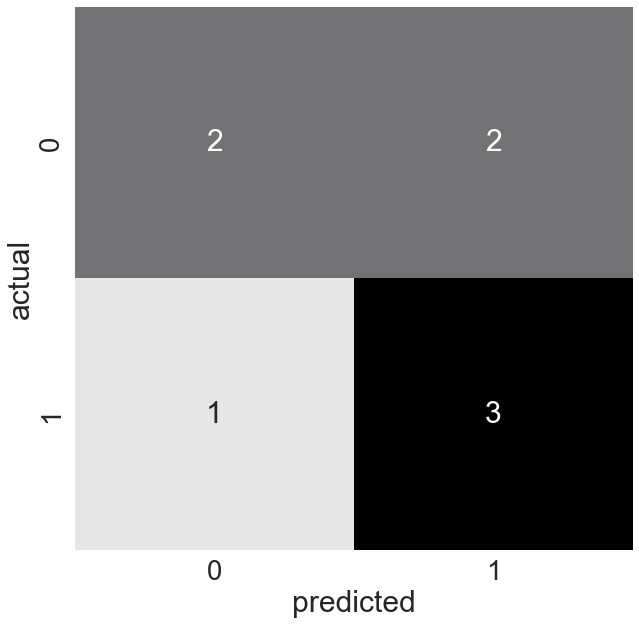

In [27]:
import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)
import seaborn as sns

# confusion matrix
cm=metrics.confusion_matrix(y_true,y_pred)

#plotting

plt.figure(figsize=(10,10))

cmap=sns.cubehelix_palette(50, hue=0.05, rot=0, light =0.9 , dark=0, as_cmap=True)
sns.set(font_scale=2.5)
sns.heatmap(cm, annot=True, cmap=cmap, cbar=False)
plt.ylabel('actual')
plt.xlabel("predicted")

In [28]:
TP=true_positive(y_true,y_pred)
print(f"True Positive : {TP}")

TN=true_negative(y_true,y_pred)
print(f"True Negative : {TN}")

FP=false_positive(y_true,y_pred)
print(f"False Positive : {FP}")

FN=false_negative(y_true,y_pred)
print(f"False Negative : {FN}")

True Positive : 3
True Negative : 2
False Positive : 2
False Negative : 1


# Metrics for mltilabel classification
    1. Percision at k
    2. Average percision at k 
    3. Mean Average precision at k
    4. Log Loss

# Precision at k


In [39]:
def pk(y_true, y_pred,k):
    if k==0:
        return 0
    
    y_pred=y_pred[:k]
    pred_set=set(y_pred)
    print(f"Pred Set : {pred_set}")
    true_set=set(y_true)
    print(f"True set : {true_set}")
    
    common_values=pred_set.intersection(true_set)
    print(f"Common values : {common_values}")
    
    
    length=len(common_values)/len(y_pred[:k])
    print(length)
    
    return length
    

In [40]:
y_true = [
...: [1, 2, 3],
...: [0, 2],
...: [1],
...: [2, 3],
...: [1, 0],
...: []
...: ]

In [41]:
 y_pred = [
...: [0, 1, 2],
...: [1],
...: [0, 2, 3],
...: [2, 3, 4, 0],
...: [0, 1, 2],
...: [0]
...: ]

In [42]:
y_true=[1,2, 3, 5,6,7,8]
y_pred=[1,2,3,4,5,8,9]

In [43]:
pk(y_true,y_pred,3)

Pred Set : {1, 2, 3}
True set : {1, 2, 3, 5, 6, 7, 8}
Common values : {1, 2, 3}
1.0


1.0